In [18]:
from sklearn.neighbors import KNeighborsClassifier 
import matplotlib.pyplot as plt 
import SBS

import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic asid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids',
                   'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.fit_transform(X_test)

In [23]:
knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS.SequentialBackwardSelection(knn, k_features=1)
sbs.fit(X_train_std, y_train)

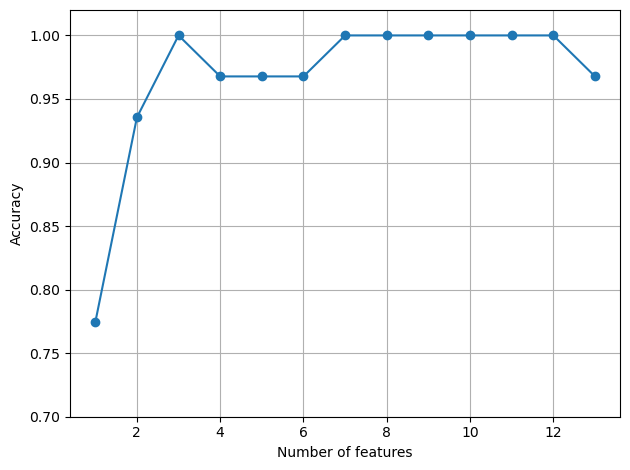

In [25]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [27]:
k3 = list(sbs.subsets_[13 - 3])
print(df_wine.columns[1:][k3])

Index(['Alcohol', 'Malic asid', 'OD280/OD315 of diluted wines'], dtype='object')


In [31]:
knn.fit(X_train_std[:, k3], y_train)
print('Training accuracy: ', knn.score(X_train_std[:, k3], y_train))
print('Test accuracy: ', knn.score(X_test_std[:, k3], y_test))

Training accuracy:  0.9516129032258065
Test accuracy:  0.9259259259259259
